In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar
from matplotlib import rc
from scipy.optimize import fsolve
from scipy.integrate import simpson
from numpy import trapz
from numpy.polynomial.polynomial import polyfit
from scipy import integrate
mpl.rcParams['axes.linewidth'] = 3
import matplotlib as mpl  
import matplotlib.colors as mcolors
plt.rcParams["font.family"] = "Times New Roman"


In [14]:
def charge_gap_vs_chemical_potential_contour_plots(Text_dir,Graph_dir,N,u,dtau,trot):
    
    filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dKappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir,N,u[0],dtau,N,u[0],dtau,trot)
    nden,dkdt,dkdt_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [1,3,4])
        
    dK_dT = np.zeros(len(nden)*(len(u)))      #dkappa_dT.tolist()
    dK_dT_std = np.zeros(len(nden)*(len(u)))  #dkappa_dT_std.tolist()
    Mu_val = np.zeros(len(nden)*(len(u)))
    U_val = np.zeros(len(nden)*(len(u)))      #T.tolist()
    Nden = np.zeros(len(nden)*(len(u)))      #[float(U[0])*x for x in [1]*len(Trot)]
    n_len = len(nden)
    print("nden",nden)
    for k in range(len(u)):
        print(u[k])
        start_ind = k*n_len
        end_ind = (k+1)*n_len
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dKappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir,N,u[k],dtau,N,u[k],dtau,trot)
        mu_val,num_den,dkdt,dkdt_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])
        Nden[start_ind:end_ind] = np.copy(num_den)
        dK_dT[start_ind:end_ind] = np.copy(dkdt)
        dK_dT_std[start_ind:end_ind] = np.copy(dkdt_std)
        U_val[start_ind:end_ind] = float(u[k])*np.ones(len(nden))
        Mu_val[start_ind:end_ind] = np.copy(mu_val)

    Mu_grid = np.linspace(np.nanmin(Mu_val),np.nanmax(Mu_val),num = 2*len(mu_val)+1)
    U_grid = np.linspace(np.nanmin(U_val),np.nanmax(U_val),num=2*(len(u))+1)

    Mu_mesh,U_mesh = np.meshgrid(Mu_grid,U_grid,indexing = 'xy')
    grid_k_c = griddata(np.stack((Mu_val,U_val),axis=1),dK_dT,(Mu_mesh,U_mesh),method = 'cubic')
    
    cm = matplotlib.colormaps.get_cmap('seismic')

    plt.figure()
    plt.figure(figsize = (25,20))
    ax = plt.gca()
    plt.xticks(fontsize = 80)
    plt.yticks(fontsize = 80)
    plt.tick_params(axis='both', which='major', direction='out', pad=20,length = 30, width = 2.5,labelsize = 120)
    plt.tick_params(axis='both', which='minor', direction='out', pad=20,length = 15, width = 1.5,labelsize = 60)
    im = plt.contourf(Mu_mesh,U_mesh,grid_k_c,np.arange(-0.07, 0.07, .005),extend='both',cmap = cm)
    plt.grid('True',which = 'both')
    CS_2 = ax.contour(Mu_mesh,U_mesh,grid_k_c, [0.0], colors = ['black'], linestyles = ['dashdot'],linewidths = [5])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax= cax)
    cbar.ax.tick_params(labelsize = 60)
    plt.tight_layout()
    plt.savefig("%s/dkappa_dT_vs_chemical_potential_N_%s_dtau_%s_L_%s_contour.png"%(Graph_dir,N,dtau,trot))

In [15]:
def charge_gap_vs_density_contour_plots(Text_dir,Graph_dir,N,u,dtau,trot):
    
    filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dKappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir,N,u[0],dtau,N,u[0],dtau,trot)
    nden,dkdt,dkdt_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [1,3,4])
        
    dK_dT = np.zeros(len(nden)*(len(u)))      #dkappa_dT.tolist()
    dK_dT_std = np.zeros(len(nden)*(len(u)))  #dkappa_dT_std.tolist()
    Mu_val = np.zeros(len(nden)*(len(u)))
    U_val = np.zeros(len(nden)*(len(u)))      #T.tolist()
    Nden = np.zeros(len(nden)*(len(u)))      #[float(U[0])*x for x in [1]*len(Trot)]
    n_len = len(nden)

    for k in range(len(u)):
        print(u[k])
        start_ind = k*n_len
        end_ind = (k+1)*n_len
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dKappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir,N,u[k],dtau,N,u[k],dtau,trot)
        mu_val,num_den,dkdt,dkdt_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])
        Nden[start_ind:end_ind] = np.copy(num_den)
        dK_dT[start_ind:end_ind] = np.copy(dkdt)
        dK_dT_std[start_ind:end_ind] = np.copy(dkdt_std)
        U_val[start_ind:end_ind] = float(u[k])*np.ones(len(nden))
        Mu_val[start_ind:end_ind] = np.copy(mu_val)

    Mu_grid = np.linspace(np.nanmin(Mu_val),np.nanmax(Mu_val),num = 2*len(mu_val)+1)
    U_grid = np.linspace(np.nanmin(U_val),np.nanmax(U_val),num=2*(len(u))+1)
    N_grid = np.linspace(1,np.nanmax(Nden),num=2*(len(nden))-1)
    
    N_mesh,U_mesh = np.meshgrid(N_grid,U_grid,indexing = 'xy')
    grid_k_c = griddata(np.stack((Nden,U_val),axis=1),dK_dT,(N_mesh,U_mesh),method = 'cubic')
    
    cm = matplotlib.colormaps.get_cmap('seismic')

    plt.figure()
    plt.figure(figsize = (25,20))
    ax = plt.gca()
    plt.xlim(1,1.2)
    plt.xticks([1.0,1.05,1.10,1.15,1.2],fontsize = 80)
    plt.yticks([1,3,5,7,9],fontsize = 80)
    plt.tick_params(axis='both', which='major', direction='out', pad=20,length = 30, width = 2.5,labelsize = 120)
    plt.tick_params(axis='both', which='minor', direction='out', pad=20,length = 15, width = 1.5,labelsize = 60)
    im = plt.contourf(N_mesh,U_mesh,grid_k_c,np.arange(-0.1, 0.1, .0025),extend='both',cmap = cm)
    plt.grid('True',which = 'both')
    CS_2 = ax.contour(N_mesh,U_mesh,grid_k_c, [0.0], colors = ['black'], linestyles = ['dashdot'],linewidths = [5])
    divider = make_axes_locatable(ax)
    #cbar = plt.colorbar(im) #, ticks=[-0.05, 0.0, 0.05])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax= cax)
    cbar.set_ticks(np.linspace(-0.05, 0.05, 5))    
    cbar.ax.tick_params(labelsize = 60)
    plt.tight_layout()
    plt.savefig("%s/dkappa_dT_vs_density_N_%s_dtau_%s_L_%s_contour.png"%(Graph_dir,N,dtau,trot))

In [54]:
def charge_gap_contour_plots(Text_dir_doublon,Graph_dir,N,U,dtau,trot):
    
    filename_doublon = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_doublon,N,U[0],dtau,N,U[0],dtau,trot)
    nden,db,db_std = np.loadtxt(filename_doublon,unpack = 'True',usecols = [1,3,4])
        
    dD_dT = np.zeros(len(nden)*(len(U)))      #dkappa_dT.tolist()
    dD_dT_std = np.zeros(len(nden)*(len(U)))  #dkappa_dT_std.tolist()
    U_val = np.zeros(len(nden)*(len(U)))      #T.tolist()
    Nden = np.zeros(len(nden)*(len(U)))      #[float(U[0])*x for x in [1]*len(Trot)]
    n_len = len(nden)

    for k in range(len(U)):
        #print("Trot",Trot[k])
        #print("U",U[k])
        start_ind = k*n_len
        end_ind = (k+1)*n_len
        filename_doublon = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_doublon,N,U[k],dtau,N,U[k],dtau,trot)
        mu,num_den,db,db_std = np.loadtxt(filename_doublon,unpack = 'True',usecols = [0,1,3,4])
        Nden[start_ind:end_ind] = np.copy(num_den)
        dD_dT[start_ind:end_ind] = np.copy(db)
        dD_dT_std[start_ind:end_ind] = np.copy(db_std) #-0.25*np.power(num_den,2)
        U_val[start_ind:end_ind] = float(U[k])*np.ones(len(nden))
        #print("mu", mu)
        #print("nden",num_den) 
    #print(T_val)
    N_grid = np.linspace(np.nanmin(Nden),np.nanmax(Nden),num = 2*n_len+1)
    U_grid = np.linspace(np.nanmin(U_val),np.nanmax(U_val),num=2*(len(U)-2)+1)
    N_mesh,U_mesh = np.meshgrid(N_grid,U_grid,indexing = 'xy')
    grid_d_c = griddata(np.stack((Nden,U_val),axis=1),dD_dT,(N_mesh,U_mesh),method = 'cubic')
    cm = matplotlib.colormaps.get_cmap('seismic')

    norm = mcolors.TwoSlopeNorm(vmin=-0.05, vcenter=0.002, vmax=0.05)    
    plt.figure(figsize = (28,20))
    ax = plt.gca()
    plt.xticks([1.0,1.05,1.10,1.15,1.20],fontsize = 100)
    plt.yticks(fontsize = 100)
    plt.tick_params(axis='both', which='major', direction='out', pad=20,length = 30, width = 2.5,labelsize = 120)
    plt.tick_params(axis='both', which='minor', direction='out', pad=20,length = 15, width = 1.5,labelsize = 60)
    im = plt.contourf(N_mesh,U_mesh,grid_d_c,np.arange(-0.05, 0.05, .0025),extend='both',cmap = cm, norm=norm)
    plt.xlim(1.0,1.2)
    plt.ylim(0.0,7.8)
    plt.grid(color='white', alpha=0.5, which='both')
    ax = plt.gca()
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.1)
    CS_2 = ax.contour(N_mesh,U_mesh,grid_d_c, [0.0], colors = ['black'], linestyles = ['dashdot'],linewidths = [5])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax= cax)
    cbar.set_ticks(np.linspace(-0.05, 0.05, 6)) 
    cbar.ax.tick_params(labelsize = 70)
    
    plt.tight_layout()
    plt.savefig("%s/dkappa_dT_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,trot))

    dat0= CS_2.allsegs[0][0]
    #print('x',dat0[:,0])
    #print('y',dat0[:,1])

In [55]:
def main():

    N = "10"
    Dtau = "0.05"

    U=["0.00","1.0","2.0","3.0","4.00","5.0","6.00","7.0","8.00","9.0"]
    Mu = ["-0.20","0.00","0.20","0.40","0.60","0.80","1.00","1.20","1.40","1.60","1.80","2.00","2.50","3.00","3.50","4.00","4.50","5.00","5.50","6.00","6.50","7.00",
          "7.50","8.00","8.50","9.00","9.50","10.00"]
    Trot = ["30"] 
    Text_dir_main = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_phase_diagram/Text_files_N_%s_charge_gap'%(N,N)

    Graph_dir = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s/Graphs_N_%s_dtau_%s_charge_gap'%(N,N,Dtau)
    if not os.path.exists(Graph_dir):
        os.makedirs(Graph_dir)

    for k in range(len(Trot)):
        charge_gap_contour_plots(Text_dir_main,Graph_dir,N,U,Dtau,Trot[k])
    



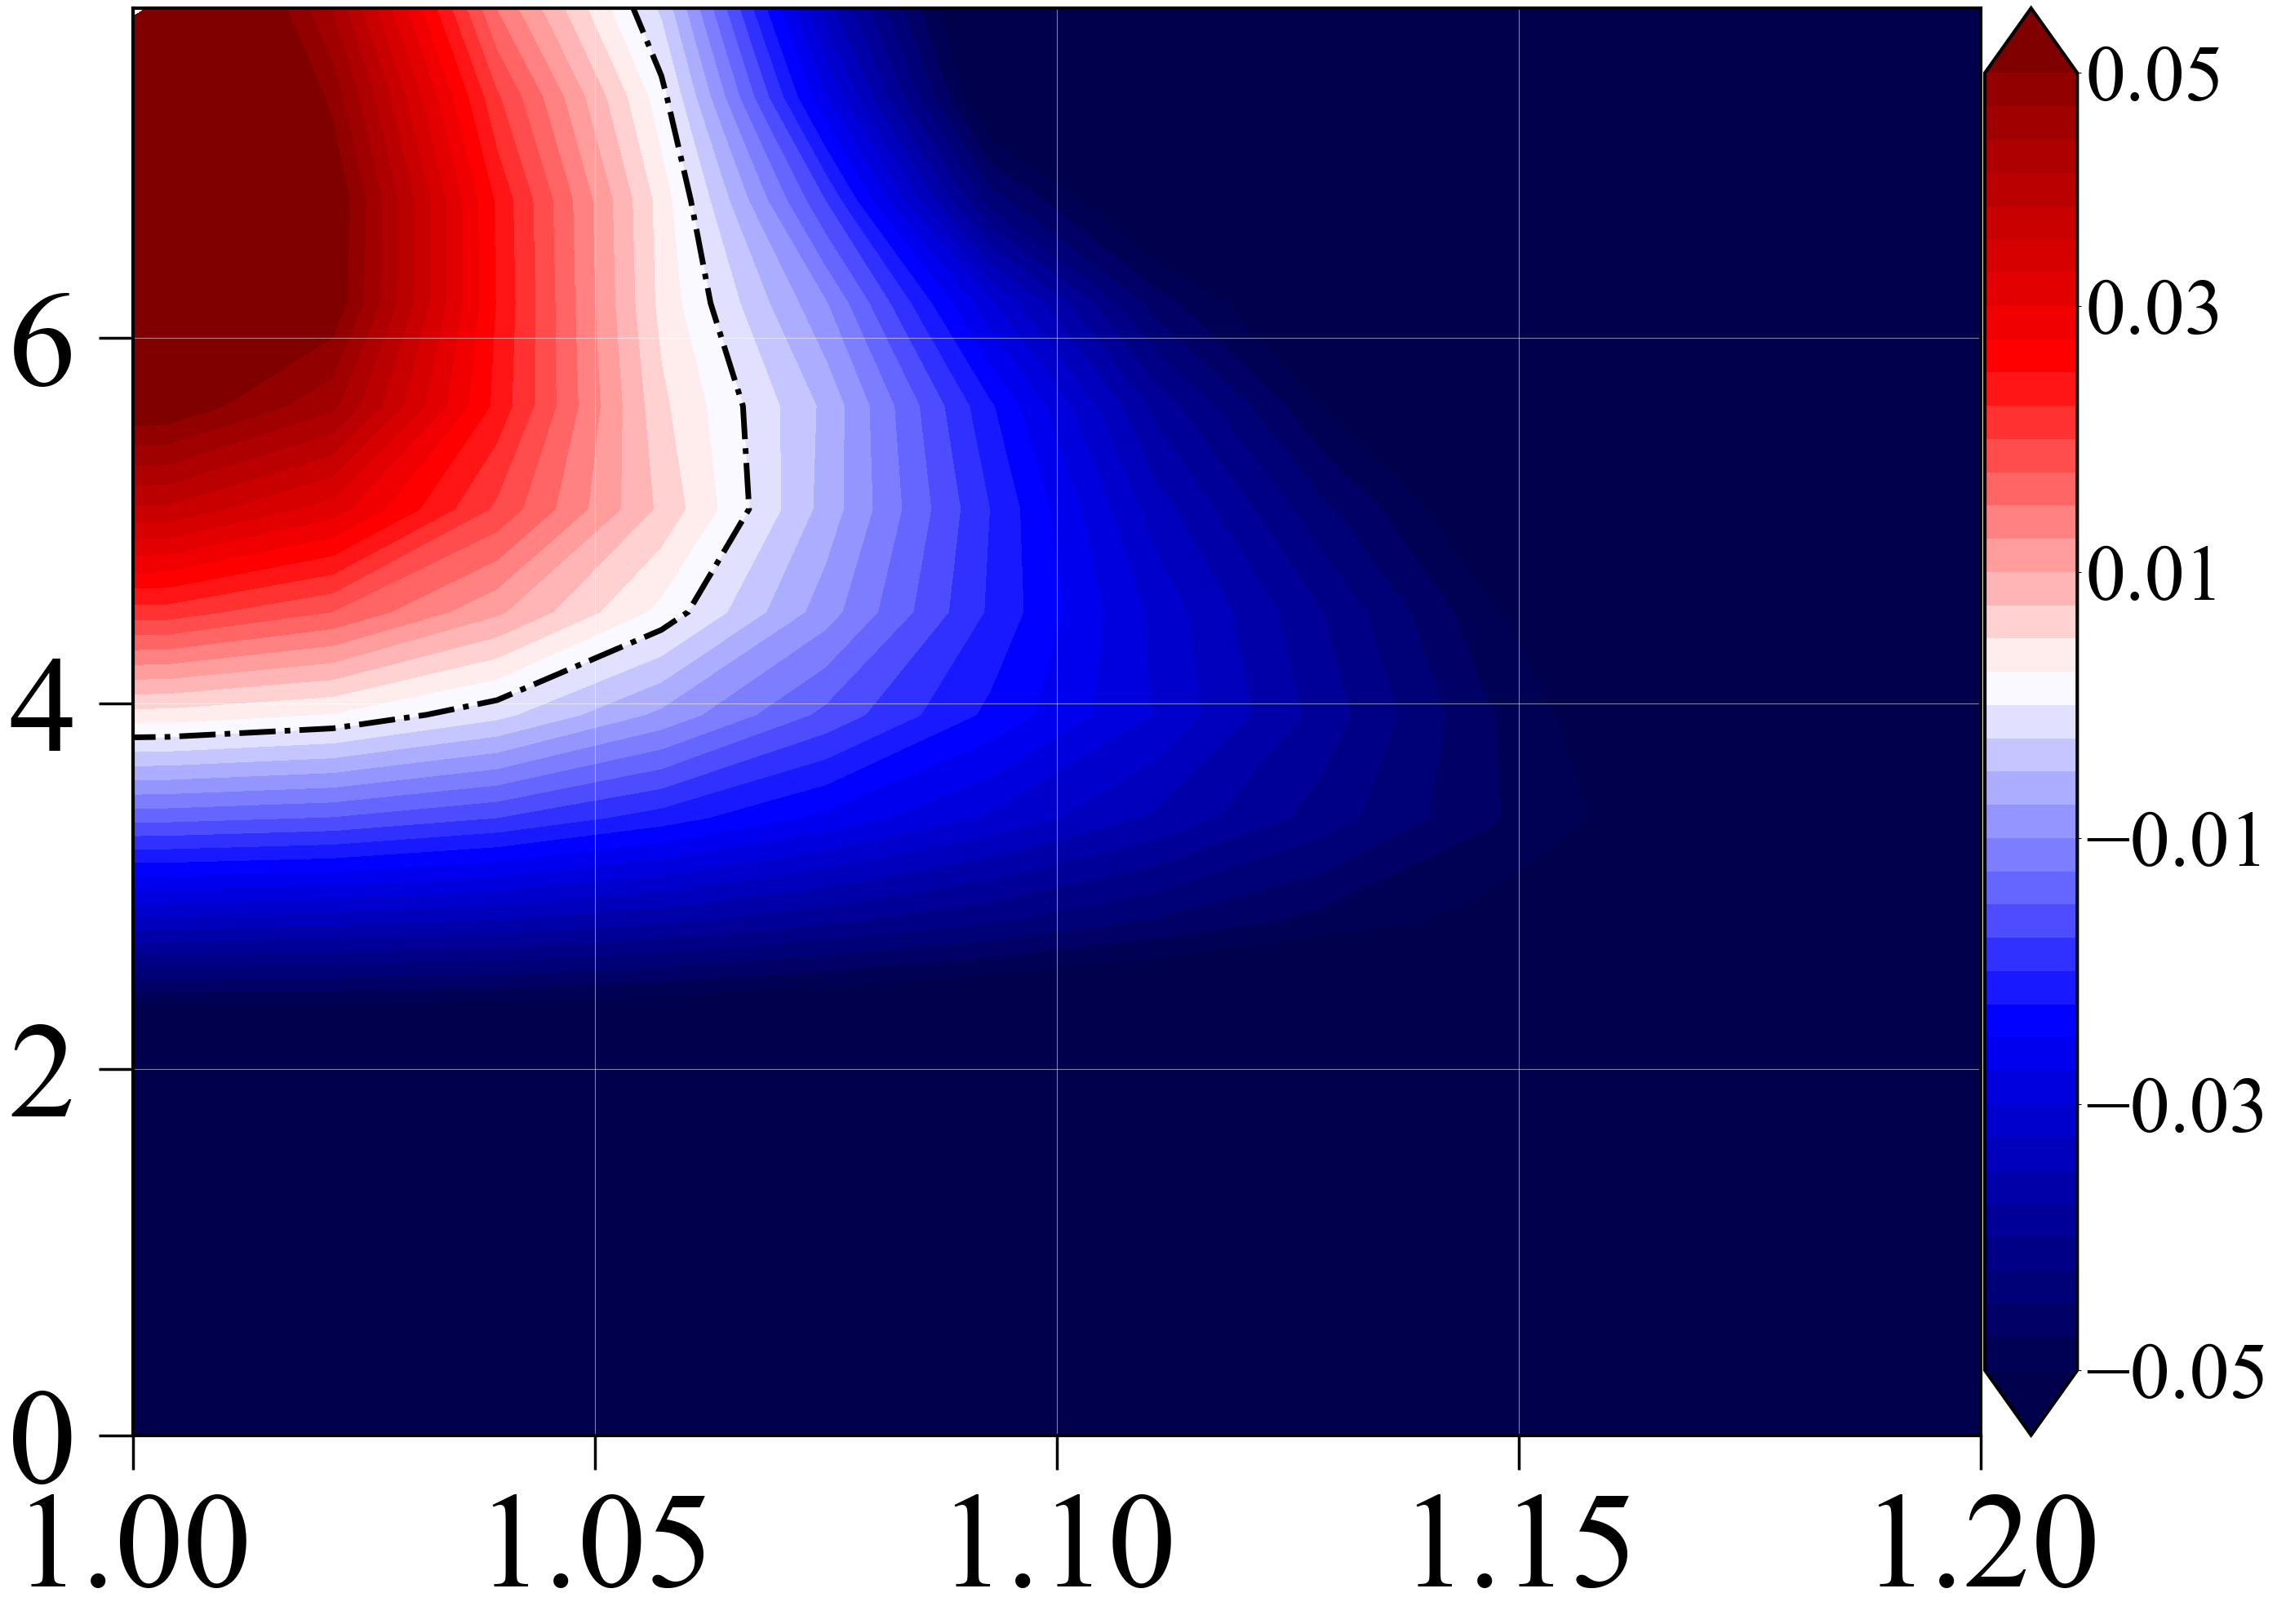

In [56]:
main()